This investigation aims to plot overhead time vs angular separation of successive observations. This will give us an indication of the slew time, which we can compare to the number given in: https://github.com/lsst-pst/survey_strategy/blob/master/Constraints.md


In [2]:
#Creates a list of all pointings, with [LIBID, RA, DECL, MJD IDEXPT  FLT GAIN NOISE SKYSIG (pixels)  RATIO  ZPTAVG ZPTERR  MAG]
from parse_simlib import parse_simlib

libid_details, pointings_arr = parse_simlib('../simlibs/minion_1016_WFD.simlib')

print len(pointings_arr)

2083758


In [29]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import scipy
import os
import matplotlib.pylab as plt
%matplotlib inline

#slew_times = [overhead time, angular separation, change band?] changeband = 0 for no change and 1 for change of band.
slew_times = np.zeros([len(pointings_arr)-1, 3]) #length of overhead_times is len(mjd_band) - 1

#slew times
slew_times[:,0] = pointings_arr[1:,3] - pointings_arr[:-1,3]

#angular separations
loc3 = SkyCoord(ra=pointings_arr[:-1,1] * u.degree, dec=pointings_arr[:-1,2] * u.degree)
loc4 = SkyCoord(ra=pointings_arr[1:,1] * u.degree, dec=pointings_arr[1:,2] * u.degree)
slew_times[:,1] = loc3.separation(loc4).deg
    
#change filter?
slew_times[:,2] = (pointings_arr[:-1,5] != pointings_arr[1:,5]).astype(int)

print np.mean(slew_times[:,0])*3600*24

print slew_times[0:10]
print 'Number of filter changes: ', sum(slew_times[:,2])

151.314172008
[[  5.00000002e-04   2.82265669e+00   0.00000000e+00]
 [  3.99999997e-04   2.82460532e+00   0.00000000e+00]
 [  5.00000002e-04   2.82267982e+00   0.00000000e+00]
 [  4.00000004e-04   2.81759860e+00   0.00000000e+00]
 [  4.99999995e-04   2.81036370e+00   0.00000000e+00]
 [  4.00000004e-04   2.80268669e+00   0.00000000e+00]
 [  4.99999995e-04   2.79677926e+00   0.00000000e+00]
 [  4.00000004e-04   2.79601833e+00   0.00000000e+00]
 [  3.99999997e-04   3.21859325e+00   0.00000000e+00]
 [  5.00000002e-04   3.21854529e+00   0.00000000e+00]]
Number of filter changes:  8800.0


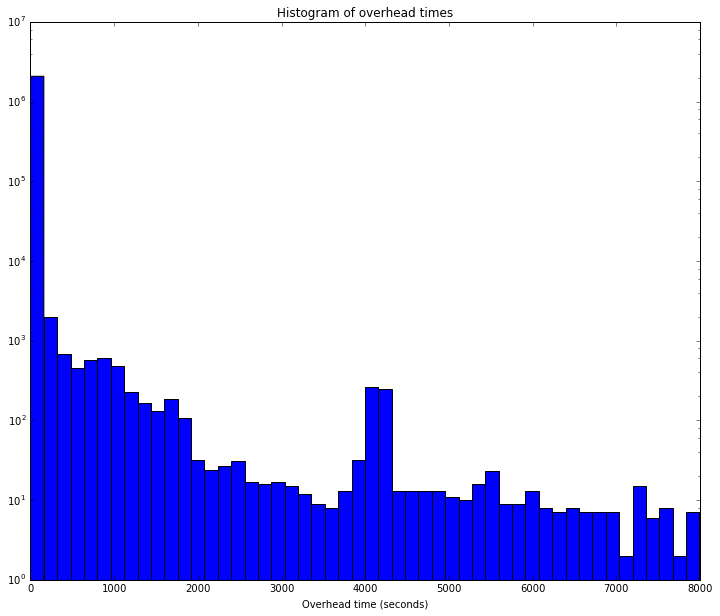

In [14]:
xmax = 8000
slews = slew_times[slew_times[:,0]<=xmax/(24*3600.), :]

figure2 = plt.figure(figsize=(12, 10))
plt.title('Histogram of overhead times')
plt.hist(slews[:,0]*24*3600, bins=50)
plt.yscale('log')
plt.xlim([0,xmax])
plt.xlabel('Overhead time (seconds)')
plt.show()

os.chdir('/data/des41.a/data/jaortiz/snana-test/')
figure2.savefig('figures/overhead_times')

0.996072478701
[  1.67704959  33.52507707]


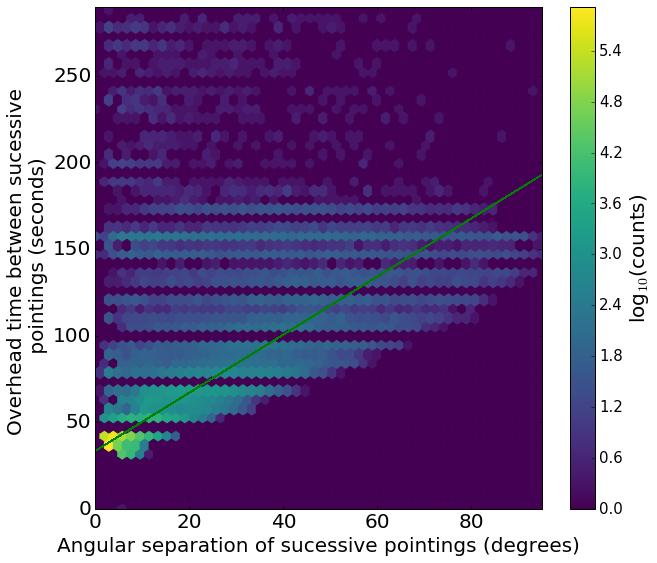

In [45]:
figure1 = plt.figure(figsize=(10, 9))

small_slew_times = slew_times[slew_times[:,0]< 300/(24*3600.), :]
print len(small_slew_times)/ float(len(slew_times))

plt.hexbin(small_slew_times[:,1], small_slew_times[:,0]*24*3600, gridsize=50, cmap='viridis', bins='log')
cb = plt.colorbar()
cb.set_label('log$_{10}$(counts)', fontsize=20)
cb.ax.tick_params(labelsize=15) 

#plt.scatter(small_slew_times[:,1], small_slew_times[:,0]*24*3600, marker='x')
#plt.title('Angular separation against overhead time for sets of sucessive observations', size=18, y=1.02)
plt.xlabel('Angular separation of sucessive pointings (degrees)', size=20)
plt.ylabel('Overhead time between sucessive \n pointings (seconds)', size=20)
plt.ylim([0,290])
plt.xlim(xmin=0,xmax=95)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#linear regression for line of best fit
#points = np.arange(0,150,0.01)
#plt.plot(points, 1.1*points + 23, color='green')

fit = np.polyfit(small_slew_times[:,1], small_slew_times[:,0]*24*3600, deg=1)
plt.plot(small_slew_times[:,1], fit[0] * small_slew_times[:,1] + fit[1], color='green')
print fit

plt.show()
os.chdir('/data/des41.a/data/jaortiz/snana-test/')
figure1.savefig('figures/slew_times')

In [68]:
slew_times = slew_times[slew_times[:,2]==1]